In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
train = pd.read_csv("../data/train.csv",nrows=5000)
train.drop('ID_code',inplace=True,axis=1)
test = pd.read_csv("../data/test.csv",nrows=5000)
test.drop('ID_code',inplace=True,axis=1)

In [3]:
train.shape

(5000, 201)

In [4]:
train.head(3)

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965


In [5]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.097400,10.699253,-1.667710,10.660088,6.833931,11.080050,-5.103466,5.390326,16.586396,0.322305,...,3.230552,7.404870,1.955016,3.342016,18.002719,-0.169063,2.237071,8.905112,15.901579,-3.401866
std,0.296531,3.027746,4.087160,2.638112,2.067673,1.623667,7.884566,0.862609,3.409190,3.351308,...,4.605151,3.026549,1.479511,3.978731,3.203292,1.417050,5.434726,0.927907,2.996058,10.522212
min,0.000000,1.335000,-13.422700,3.678500,1.154100,5.943000,-29.013300,2.673300,8.017000,-9.476600,...,-11.593900,-1.215800,-2.927700,-9.442700,10.767500,-4.488300,-12.325500,6.256900,7.233700,-36.302500
25%,0.000000,8.510025,-4.764575,8.649750,5.244775,9.862050,-11.328125,4.757775,14.044450,-2.342025,...,-0.155400,5.120350,0.926050,0.603175,15.551925,-1.181550,-2.024175,8.250625,13.860800,-11.483600
50%,0.000000,10.557100,-1.656400,10.517100,6.856250,11.107500,-4.973200,5.352850,16.566700,0.379700,...,3.223650,7.311900,1.963650,3.415400,17.953550,-0.218200,2.473850,8.898300,15.958350,-2.901400
75%,0.000000,12.749775,1.276775,12.456575,8.389500,12.274925,0.989675,5.986925,19.061925,2.975900,...,6.412175,9.514300,2.976475,6.168425,20.528900,0.788925,6.388725,9.597900,18.118600,4.769025
max,1.000000,19.289300,8.416000,18.347700,12.906600,15.193600,17.251600,7.875500,26.284800,9.103800,...,16.211600,16.398500,7.139000,16.103300,26.628500,3.555400,14.843600,11.843900,25.442200,25.094400


In [6]:
train.target.value_counts()

0    4513
1     487
Name: target, dtype: int64

In [9]:
def plotkde(data_1,data_0,label_1,label_0,features):
    sns.set_style('whitegrid')
    fig,ax = plt.subplots(25,8,figsize=(15,50))
    i = 0
    
    for feature in features:
        i += 1
        plt.subplot(25,8,i)
        sns.kdeplot(data_1[feature], bw=0.5,label=label_1)
        sns.kdeplot(data_0[feature], bw=0.5,label=label_0)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show()

In [10]:
features = train.columns[1:]

In [29]:
d1 = train.loc[train.target == 1]
d0 = train.loc[train.target == 0]

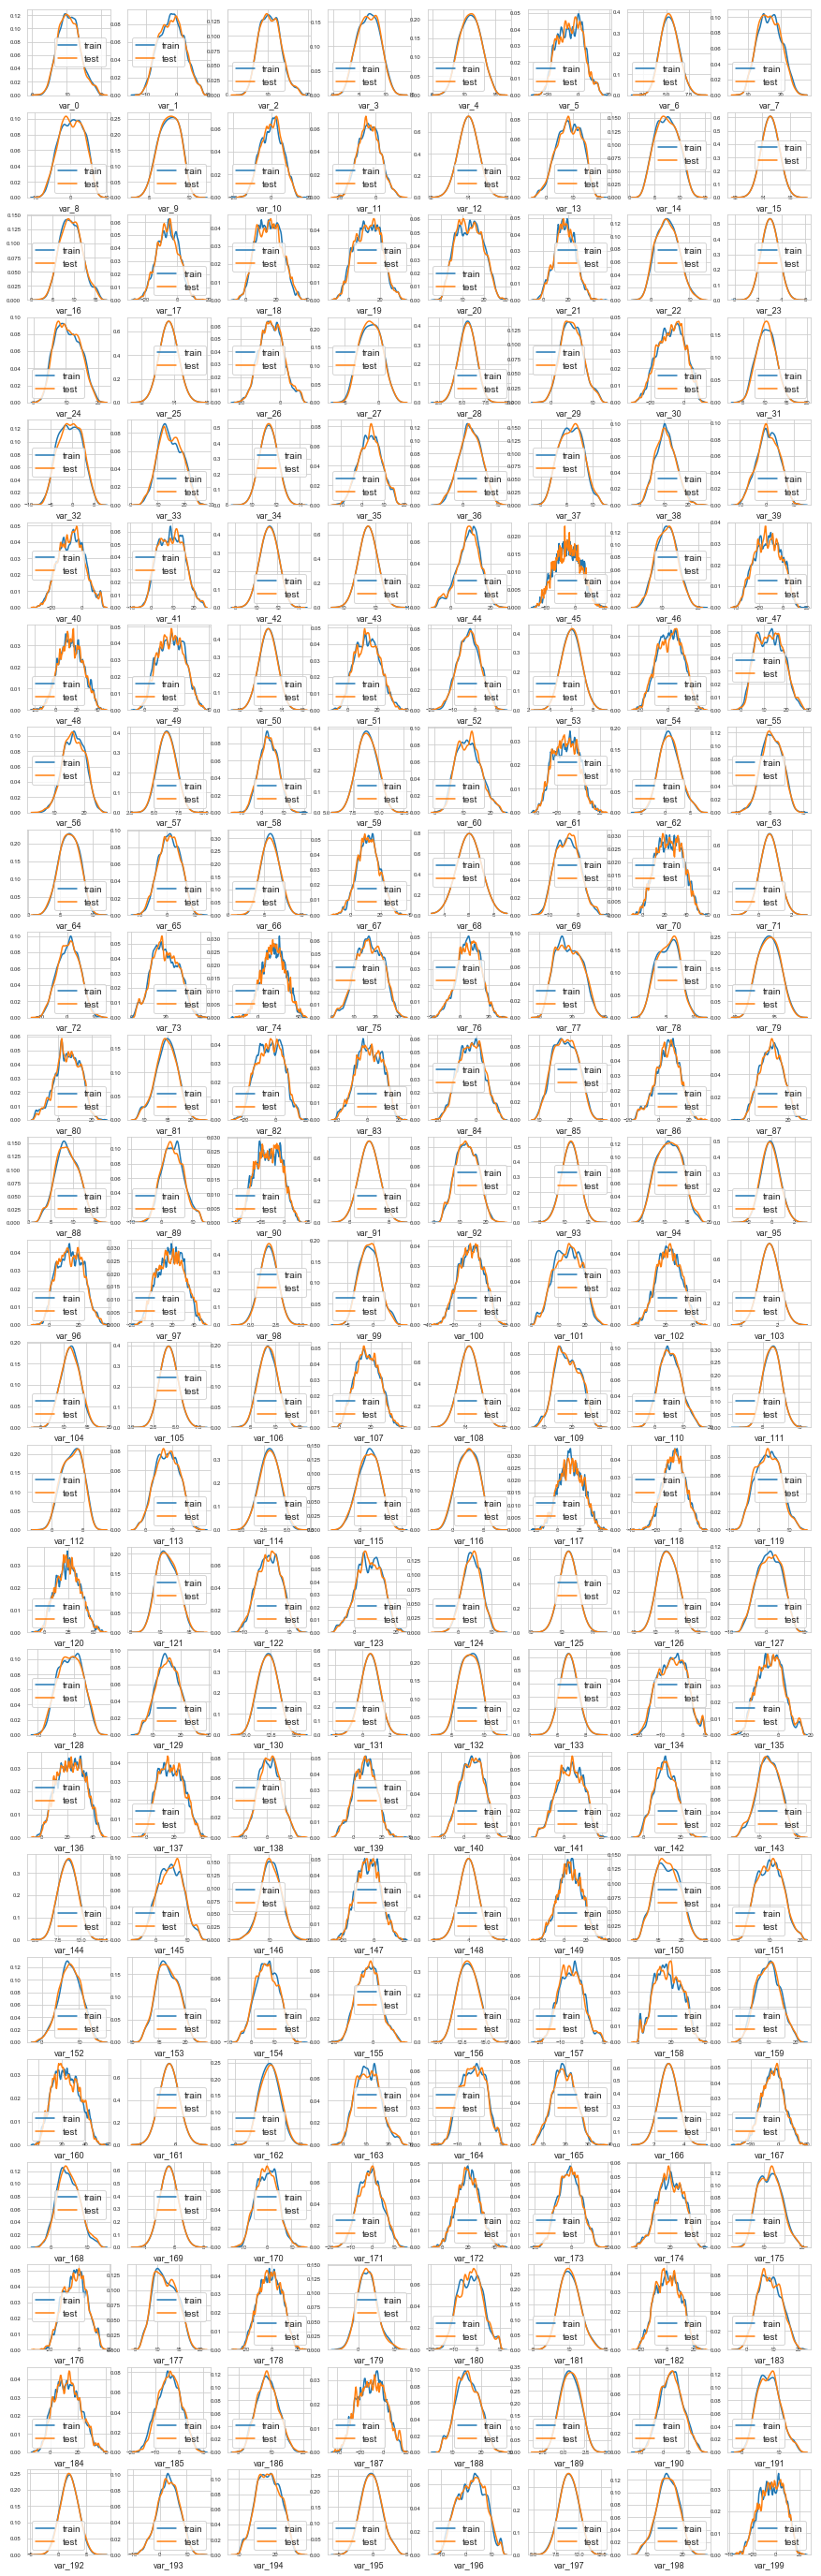

In [11]:
plotkde(train,test,'train','test',features)

In [7]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA,LatentDirichletAllocation
from sklearn.feature_selection import f_classif

In [8]:
train_x = train.drop('target',axis=1)
train_y = train['target']

In [9]:
min_max_scale_x = MinMaxScaler().fit_transform(train_x)
std_scale_x = StandardScaler().fit_transform(train_x)

In [10]:
min_pca_x = PCA(n_components=2).fit_transform(min_max_scale_x)
pca_x = PCA(n_components=2).fit_transform(train_x)
std_pca_x = PCA(n_components=2).fit_transform(std_scale_x)

In [11]:
def plotPCA(x,y):
    plt.scatter(x[:,0],x[:,1],c=y,cmap="copper_r")
    plt.axis('off')
    plt.colorbar()
    plt.show()

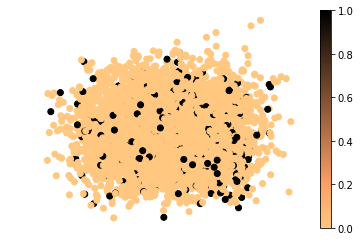

In [12]:
plotPCA(pca_x,train_y)

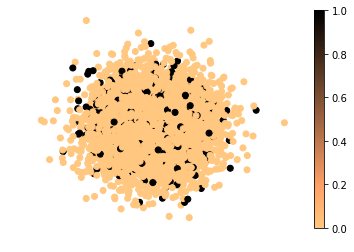

In [13]:
plotPCA(std_pca_x,train_y)

In [15]:
p_values = f_classif(std_scale_x,train_y)[1]

In [19]:
features_list = train.columns[1:]
selected_var = features_list[p_values < 0.05]

In [25]:
selected_train = train[selected_var]
selected_train['target'] = train['target']

selected_train.head()

/home/weiyi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_9,var_12,var_13,...,var_186,var_187,var_188,var_190,var_191,var_196,var_197,var_198,var_199,target
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,5.7470,14.0137,0.5745,...,11.8411,-19.7159,17.5743,4.4354,3.9642,7.8784,8.5635,12.7803,-1.0914,0
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,8.0851,14.0239,8.4135,...,7.6543,-15.9319,13.3175,7.6421,7.7214,8.1267,8.7889,18.3560,1.9518,0
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,5.9525,14.1929,7.3124,...,5.3745,-6.2660,10.1934,2.9057,9.7905,-6.5213,8.2675,14.7222,0.3965,0
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,8.2450,13.8463,11.9704,...,7.9336,-12.8279,12.4124,4.4666,4.7433,-2.9275,10.2922,17.9697,-8.9996,0
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,7.6784,13.8481,7.8895,...,6.4209,5.9270,16.0201,-1.4905,9.5214,3.9267,9.5031,17.9974,-8.8104,0
